# Language in Space

## Session 04: Tidyverse; Clustering

### Gerhard Jäger

November 18, 2021


In [1]:
library(tidyverse)

padPath = "../PAD/" # may be different on your computer



── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
words = read_tsv(paste0(padPath, "/data/words.csv"), comment="#")


Rows: 31563 Columns: 7

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): CONCEPT, COUNTERPART, DOCULECT, TOKENS
dbl (3): ID, CONCEPTID, COGID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



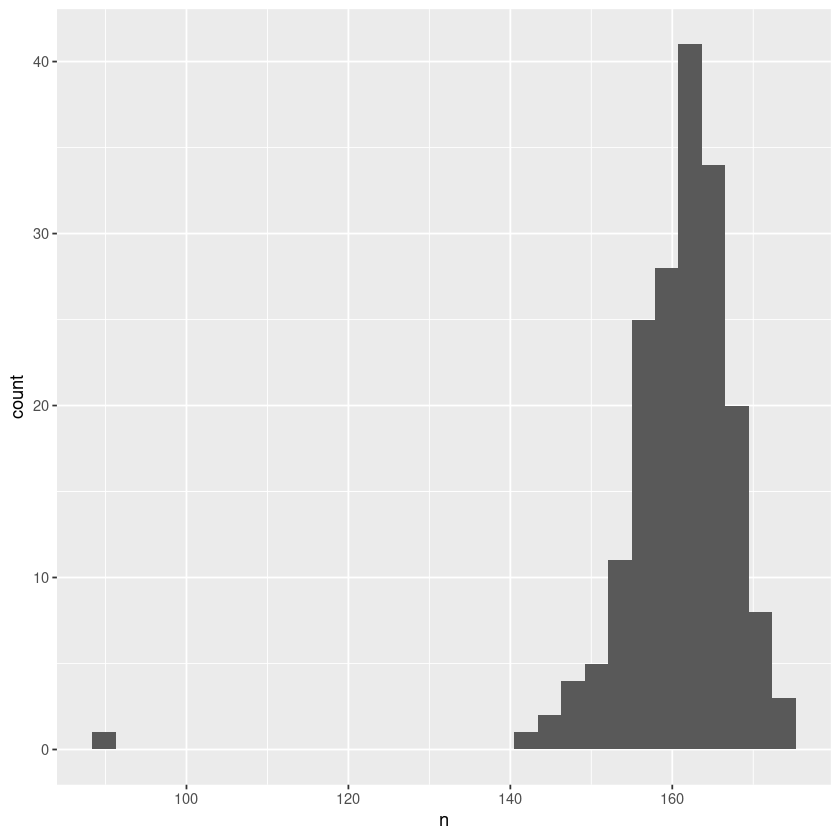

In [3]:
words %>%
    select(DOCULECT, COGID) %>%
    distinct() %>%
    group_by(DOCULECT) %>%
    summarize(n=n()) %>%
    arrange(desc(n)) %>%
    ggplot() +
        geom_histogram(aes(x=n))

In [4]:
doculects = read_tsv(paste0(padPath, "/data/doculects.csv"), comment="#")


Rows: 183 Columns: 6

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): NAME, SHORT_NAME, TRANSCRIPTOR
dbl (3): ID, LONGITUDE, LATITUDE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
cognatesets = read_tsv(paste0(padPath, "/data/cognatesets.csv"), comment="#")


Rows: 186 Columns: 5

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): COGNATE, WENKER_SENTENCE
dbl (3): COGNATE_ID, NUMBER_OF_WORDS, WENKER_ID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [6]:
freqTable <- words %>% 
    group_by(DOCULECT) %>% 
    summarise(n=n()) %>% 
    arrange(desc(n))



In [7]:
doculectsWithFrequency <- freqTable %>% 
    rename(SHORT_NAME = DOCULECT) %>% 
    inner_join(doculects)



Joining, by = "SHORT_NAME"



In [8]:
cogidFreq <- words %>% 
    select(CONCEPT, COGID) %>%
    distinct() %>%
    group_by(CONCEPT) %>%
    summarize(nClasses=n())


In [9]:
kind = read_tsv(paste0(padPath, "/alignments/corrected/Kind_1092.msa"),
               comment="#")

Rows: 129 Columns: 7

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): :ANN, COLUMNID......., 1, 2, 3, 4, 5


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [10]:
kind %>% View

:ANN,COLUMNID.......,1,2,3,4,5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
:ANN,STANDARD.......,K,.,i,n,d
:ANN,COMPLEX........,.,<,>,.,.
9363,Aachen.........,kh,-,e,ŋ,k
9323,Ahrbergen......,kh,-,i,n,t̰
9433,Albersloh......,kh,-,ɪ,n,t̰
9386,Allna..........,kʰ,-,e̜͡ə,n,d
9405,Altenberg......,kh,-,ẹ,n,t
9429,Altlandsberg...,ch,-,ɪ,nː,t̰
9310,Altwarp........,cʰ,-,i̜,n,th


# Feature extraction

### Simplest approach

1. compute *Hamming distance* between alignment entries for doculects for each cognate set
2. aggregate by averaging over all cognate sets
3. convert distances into low-dimensional feature space via *Multidimentional Scaling*

### Hamming distance

- distance between two vectors of equal length
- equals number of positions where the vectors have non-identical entries

$$
d_{rh}(x,y) \doteq |\{i|x_i \neq y_i\}|
$$


In [11]:
(x = kind[3, -(1:2)])

(y = kind[4, -(1:2)])

1,2,3,4,5
<chr>,<chr>,<chr>,<chr>,<chr>
kh,-,e,ŋ,k


1,2,3,4,5
<chr>,<chr>,<chr>,<chr>,<chr>
kh,-,i,n,t̰


In [12]:
(x != y) %>% mean()

[1] 0.6

## data preparation

get a list of all alignment files:

In [13]:
alignmentFiles <- list.files(paste0(padPath, "alignments/corrected"), full.names = T)
head(alignmentFiles)

[1] "../PAD/alignments/corrected/abend_1001.msa"     
[2] "../PAD/alignments/corrected/acht_1002.msa"      
[3] "../PAD/alignments/corrected/Aepfelchen_1003.msa"
[4] "../PAD/alignments/corrected/Affe_1004.msa"      
[5] "../PAD/alignments/corrected/alle_1005.msa"      
[6] "../PAD/alignments/corrected/als_1006.msa"

get a look at one alignment

In [14]:
i <- 36
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)

:ANN,COLUMNID.......,1,2,3,4,5,6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
:ANN,STANDARD.......,d,.,r,ei,.,.
:ANN,COMPLEX........,.,.,.,<,-,>
19497,Aachen.........,t,-,ʁ,e̜ː,-,ə
19498,Aachen.........,t,-,ʁ,ɛ→ɪ,-,-
19519,Adorf..........,d,-,ʁ,ɛ̜̠→ɪ,-,-
19694,Ahrbergen......,d,-,ʁ,ɐ̟→ɪ,-,-
19695,Ahrbergen......,t,-,ʁ,ɐ̠→ɪ,-,-
19717,Albersloh......,d,-,ɾ,ɐ̠ː→ɪ,-,-
19718,Albersloh......,d,-,ɾ,ɐ̣+→ɪ,-,-


remove first three rows


In [15]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote="",
         show_col_types = FALSE) %>%
      filter(`:ANN` != ":ANN") %>%
      slice_head(n=10)

:ANN,COLUMNID.......,1,2,3,4,5,6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19497,Aachen.........,t,-,ʁ,e̜ː,-,ə
19498,Aachen.........,t,-,ʁ,ɛ→ɪ,-,-
19519,Adorf..........,d,-,ʁ,ɛ̜̠→ɪ,-,-
19694,Ahrbergen......,d,-,ʁ,ɐ̟→ɪ,-,-
19695,Ahrbergen......,t,-,ʁ,ɐ̠→ɪ,-,-
19717,Albersloh......,d,-,ɾ,ɐ̠ː→ɪ,-,-
19718,Albersloh......,d,-,ɾ,ɐ̣+→ɪ,-,-
19725,Allna..........,t,-,ɾ,ɐː→ɪ,-,-
19726,Allna..........,t,-,ɾ,ɐ→ɪ,-,-


normalize name of second column

In [16]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      slice_head(n=10)

:ANN,COLUMNID,1,2,3,4,5,6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19497,Aachen.........,t,-,ʁ,e̜ː,-,ə
19498,Aachen.........,t,-,ʁ,ɛ→ɪ,-,-
19519,Adorf..........,d,-,ʁ,ɛ̜̠→ɪ,-,-
19694,Ahrbergen......,d,-,ʁ,ɐ̟→ɪ,-,-
19695,Ahrbergen......,t,-,ʁ,ɐ̠→ɪ,-,-
19717,Albersloh......,d,-,ɾ,ɐ̠ː→ɪ,-,-
19718,Albersloh......,d,-,ɾ,ɐ̣+→ɪ,-,-
19725,Allna..........,t,-,ɾ,ɐː→ɪ,-,-
19726,Allna..........,t,-,ɾ,ɐ→ɪ,-,-


remove multiple entries for the same doculect 

*(This is not really okay, but we'll cut this corner for the purpose of this exploration. It will simplify our live a bit further on.)*

In [17]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all = TRUE)  %>%
      slice_head(n=10)

:ANN,COLUMNID,1,2,3,4,5,6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19497,Aachen.........,t,-,ʁ,e̜ː,-,ə
19519,Adorf..........,d,-,ʁ,ɛ̜̠→ɪ,-,-
19694,Ahrbergen......,d,-,ʁ,ɐ̟→ɪ,-,-
19717,Albersloh......,d,-,ɾ,ɐ̠ː→ɪ,-,-
19725,Allna..........,t,-,ɾ,ɐː→ɪ,-,-
19507,Altenberg......,t,-,ʁ,a̠→ɪ̣,-,-
19578,Altentrüdin....,t,-,ɾ,ɐ→ɪ,-,-
19548,Altlandsberg...,d,-,ʁ,ɐ̟→ɪ,-,-
19554,Altwarp........,d,-,ɾ,ɛ→ɪ,-,-


remove the trailing dots at the end of the doculect names and store the result in a new column `doculect`

In [18]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      slice_head(n=10)

:ANN,COLUMNID,1,2,3,4,5,6,doculect
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19497,Aachen.........,t,-,ʁ,e̜ː,-,ə,Aachen
19519,Adorf..........,d,-,ʁ,ɛ̜̠→ɪ,-,-,Adorf
19694,Ahrbergen......,d,-,ʁ,ɐ̟→ɪ,-,-,Ahrbergen
19717,Albersloh......,d,-,ɾ,ɐ̠ː→ɪ,-,-,Albersloh
19725,Allna..........,t,-,ɾ,ɐː→ɪ,-,-,Allna
19507,Altenberg......,t,-,ʁ,a̠→ɪ̣,-,-,Altenberg
19578,Altentrüdin....,t,-,ɾ,ɐ→ɪ,-,-,Altentrüdin
19548,Altlandsberg...,d,-,ʁ,ɐ̟→ɪ,-,-,Altlandsberg
19554,Altwarp........,d,-,ɾ,ɛ→ɪ,-,-,Altwarp


remove `COLUMNID` column

In [19]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      select(`:ANN`, doculect, matches("[0-9]+")) %>%
      slice_head(n=10)

:ANN,doculect,1,2,3,4,5,6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19497,Aachen,t,-,ʁ,e̜ː,-,ə
19519,Adorf,d,-,ʁ,ɛ̜̠→ɪ,-,-
19694,Ahrbergen,d,-,ʁ,ɐ̟→ɪ,-,-
19717,Albersloh,d,-,ɾ,ɐ̠ː→ɪ,-,-
19725,Allna,t,-,ɾ,ɐː→ɪ,-,-
19507,Altenberg,t,-,ʁ,a̠→ɪ̣,-,-
19578,Altentrüdin,t,-,ɾ,ɐ→ɪ,-,-
19548,Altlandsberg,d,-,ʁ,ɐ̟→ɪ,-,-
19554,Altwarp,d,-,ɾ,ɛ→ɪ,-,-


## Pivoting to longer format

According to the *tidyverse* philosophy, each row in a tibble should represent an observation and each column a feature. For the purpose of comparing alignment columns, each segment in each word (from each doculect) is an observation. In the next step, we re-shape the data accordingly.

In [20]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      select(`:ANN`, doculect, matches("[0-9]+")) %>%
      pivot_longer(matches("[0-9]+"), names_to = "position", values_to = "segment") %>%
      slice_head(n=10)

:ANN,doculect,position,segment
<chr>,<chr>,<chr>,<chr>
19497,Aachen,1,t
19497,Aachen,2,-
19497,Aachen,3,ʁ
19497,Aachen,4,e̜ː
19497,Aachen,5,-
19497,Aachen,6,ə
19519,Adorf,1,d
19519,Adorf,2,-
19519,Adorf,3,ʁ


To combine the different alignments into one long tibble, we need to keep them apart.

In [21]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
    filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      select(`:ANN`, doculect, matches("[0-9]+")) %>%
      pivot_longer(matches("[0-9]+"), names_to = "position", values_to = "segment") %>%
      mutate(msa = i) %>%
      slice_head(n=10)

:ANN,doculect,position,segment,msa
<chr>,<chr>,<chr>,<chr>,<dbl>
19497,Aachen,1,t,36
19497,Aachen,2,-,36
19497,Aachen,3,ʁ,36
19497,Aachen,4,e̜ː,36
19497,Aachen,5,-,36
19497,Aachen,6,ə,36
19519,Adorf,1,d,36
19519,Adorf,2,-,36
19519,Adorf,3,ʁ,36


Gaps are now redundant.

In [22]:
read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      select(`:ANN`, doculect, matches("[0-9]+")) %>%
      pivot_longer(matches("[0-9]+"), names_to = "position", values_to = "segment") %>%
      mutate(msa = i) %>%
      filter(segment != "-") %>%
      slice_head(n=10)

:ANN,doculect,position,segment,msa
<chr>,<chr>,<chr>,<chr>,<dbl>
19497,Aachen,1,t,36
19497,Aachen,3,ʁ,36
19497,Aachen,4,e̜ː,36
19497,Aachen,6,ə,36
19519,Adorf,1,d,36
19519,Adorf,3,ʁ,36
19519,Adorf,4,ɛ̜̠→ɪ,36
19694,Ahrbergen,1,d,36
19694,Ahrbergen,3,ʁ,36


Now we do this for all alignments and collect the results by concatenating rows.

In [23]:

alignmentsL = list()
for (i in 1:length(alignmentFiles)) {
  al <- read_tsv(alignmentFiles[i], 
         comment = "#", 
         quote = "",
         show_col_types = FALSE)  %>%
      filter(`:ANN` != ":ANN") %>%
      rename(COLUMNID = 2) %>%
      distinct(COLUMNID, .keep_all=T) %>%
      mutate(doculect = str_replace_all(COLUMNID, "\\.", "")) %>%
      select(`:ANN`, doculect, matches("[0-9]+")) %>%
      pivot_longer(matches("[0-9]+"), names_to = "position", values_to = "segment") %>%
      mutate(msa = i) %>%
      filter(segment != "-")
  alignmentsL[[i]] = al
}  

alignments <- alignmentsL %>%
  bind_rows()

alignments %>%
    slice_sample(n=20)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


:ANN,doculect,position,segment,msa
<chr>,<chr>,<chr>,<chr>,<int>
23168,Hönebach,3,ɤ→ɪ,122
20079,Ulbering,3,ɾ,27
24540,Schwabstedt,1,fː,50
15693,Kuhstedt,2,ɪ̣,86
11428,GrossMohrdorf,1,x,91
31316,Verchen,3,ø̣ʿ,129
4806,Hönebach,4,ç,136
26733,Hohenkörben,3,j,42
14028,Tann(Rhön),2,ạː,171


There is a huge number of different segment symbols, which makes comparison via the Hamming distance not too informative (because it would be sensitive to the differences between annotators).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



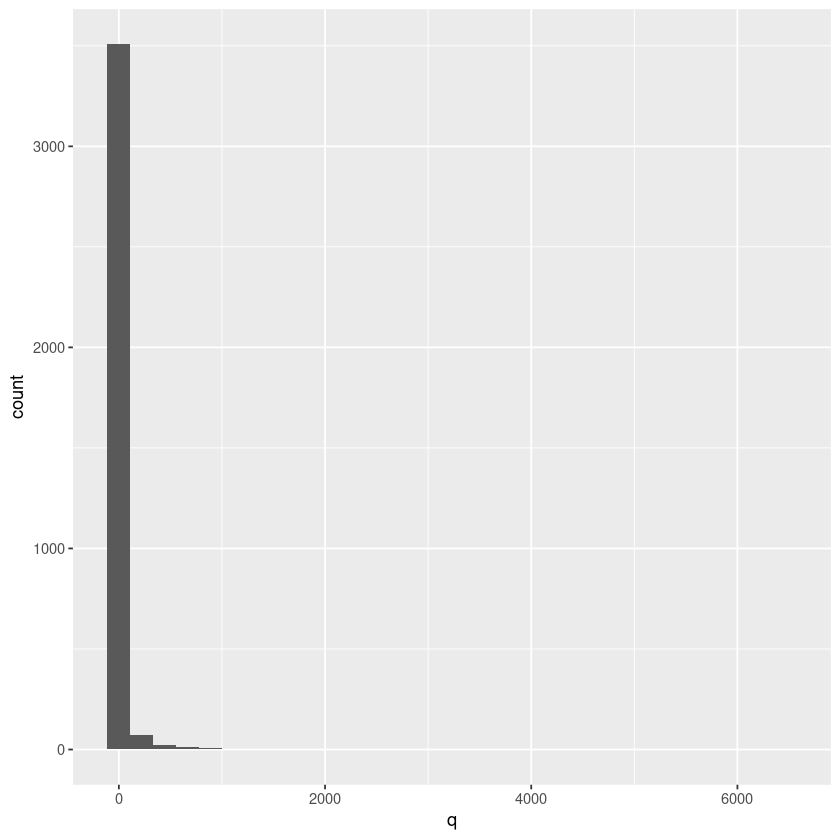

In [24]:
segmentFreqs <- alignments %>% 
  group_by(segment) %>%
  summarise(q = n()) %>%
  arrange(desc(q))

ggplot(segmentFreqs) +
  geom_histogram(aes(x=q))



In [26]:
 segmentFreqs

segment,q
<chr>,<int>
ə,6462
n,6258
t,5782
l,4932
f,4017
s,3710
m,3046
p,2483
β,2473


Frequencies of symbols follows power law ("Zipfian distribution")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


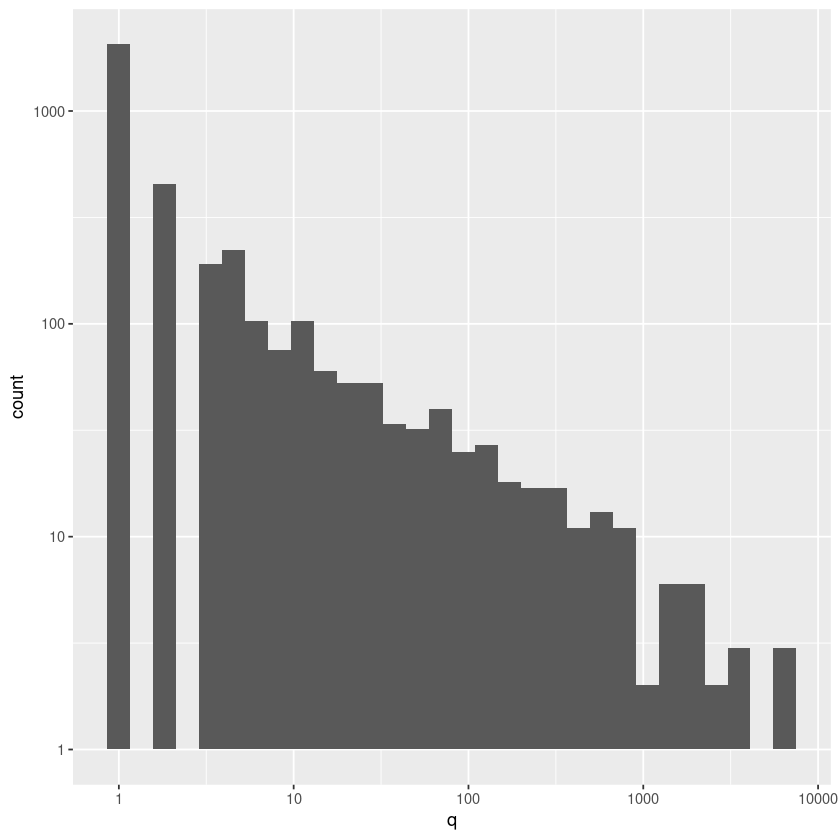

In [25]:
ggplot(segmentFreqs) +
  geom_histogram(aes(x=q)) + 
  scale_x_log10() + 
  scale_y_log10()

We will disregard all symbols which occur less than 50 times.

In [27]:
minFrequency = 50

alignmentsPruned <- alignments %>% 
  inner_join(segmentFreqs) %>%
  filter(q >= minFrequency)

alignmentsPruned %>%
    arrange(q) %>%
    slice_sample(n=10)

Joining, by = "segment"



:ANN,doculect,position,segment,msa,q
<chr>,<chr>,<chr>,<chr>,<int>,<int>
22647,Götz,3,ʊ,141,861
27149,Bockelwitz,2,ɦ,80,1252
26984,Altenberg,8,n̩,156,1523
23836,Vietmannsdorf,7,l̠,22,507
3167,Mockern,2,ɐ̟→ɪ,43,197
16997,Büdesheim,9,p,10,2483
1976,Wildpoldsried,7,ɛ̣,66,308
27798,Stöcken,7,z,155,812
27437,Gelting,1,p͡f,121,243


remaining segment types

In [28]:

(segmentLevels <- alignmentsPruned %>%
  select(segment) %>%
  distinct() %>% .[[1]])


[1] "ɔ"   "β"   "ə̟"   "n"   "t"   "ɔː"  "b"   "n̩"   "m"   "ɒ"   "oː"  "ə"  
 [13] "tʰ"  "ɔ̟"   "th"  "t̰͡s"  "ɑ̟"   "m̩"   "t̰"   "ʔ"   "ɒː"  "v"   "ɤː"  "ɔ̜"  
 [25] "o̜ː"  "ɑː"  "tʼ"  "ɔ̣ː"  "b̰"   "ɒ̣ː"  "ɤ"   "ə̃"   "oʿː" "d"   "u̜ː"  "ɑʾ" 
 [37] "o"   "ɒ̣"   "ɐ→ʊ" "ɔ̣"   "ɔ̜ː"  "t͡s̠"  "o̜"   "ə̰"   "ʌ"   "a̠ː"  "a̠"   "oʿ" 
 [49] "w"   "ʋ"   "p"   "ə̠"   "ɔʿ"  "θ"   "ɸ"   "ɐ"   "ọ"   "ɑ̟ː"  "k"   "s"  
 [61] "t͡s"  "t͡θ"  "əʾ"  "aː"  "ʀ̥"   "a"   "x"   "χ"   "ɑ"   "x̟"   "x̠"   "ə̣"  
 [73] "t̪"   "ç"   "ə̟ʾ"  "ɛ̠"   "h"   "ẹ"   "ɪ"   "ə̜"   "x̰"   "ɛː"  "ʌʾ"  "pʰ" 
 [85] "l"   "ɛ"   "œʿ"  "ɛ̜"   "l̠"   "n̥"   "œ̣"   "æ̣"   "p̰͡f"  "l̩"   "e̜"   "ph" 
 [97] "ɭ"   "e"   "p͡f"  "ɫ"   "ʃ"   "ɕ"   "eː"  "ɛ̣"   "l̰"   "ʒ"   "f"   "œ̠"  
[109] "œ"   "ʃ̠"   "n̰"   "ạ"   "n̩͡n̥"  "æ"   "e̠"   "ʏ"   "øː"  "ʃ̟"   "ɾ̥"   "ɪ̣"  
[121] "ɛ̣ː"  "ə̜+"  "ʁ"   "ɪ̜"   "ɪ̠"   "i̜"   "ø̜"   "k͡x̰"  "ə̠ʾ"  "r"   "z̠"   "ə̤"  
[133] "f͡v"  "ɦ"   "ɛ̜ː"  "ɛʾ"  "ɐʾ"  "ɤʾ"  "s̠"   "s̟"   "z͡s"  "ð"   "z"   "t͡s̟" 
[145] "z̟"   "ɾ"   "ə→ʊ" "d̰"   "ə˻"  "i"   "ɹ"   "d̪"   "ʁ̰"   "ŋ"   "ɡ"   "ɣ"  
[157] "ɱ"   "k̰"   "kh"  "ʊ"   "ʊ̣ː"  "uː"  "a→ɪ" "ɤ→ɪ" "ɪː"  "e̜ː"  "ø"   "e̜→ɪ"
[169] "a̠→ɪ̜" "ɐ̟"   "œː"  "ʏ̜"   "e͡ɪ"  "ɛ̠→ɪ" "a̠→ɪ" "ɐ→ɪ" "ɐ̟→ɪ" "ɛ→ɪ" "o͡ʊ"  "ɯ"  
[181] "ʊ̣"   "ʊ̜"   "kʰ"  "u̜"   "ʊ̟"   "ʊʿ"  "u"   "ŋ̩"   "k͡x"  "k̟"   "ɛ→ə̜" "j"  
[193] "ɪ̣ː"  "ʀ"   "ɐ̣"   "ɻ"   "β̫"   "ɔ̟ʿ"  "ʊ→ə" "yː"  "ɛ̜→ɪ" "ạ→ɪ" "i̠"   "i̜ː" 
[205] "ʏ̣"   "ɛ̣→ɪ" "iː"  "ɐ̠→ɪ" "i̠ː"  "s͡z"  "ɪ→ə" "æː"  "æ̣ː"  "ʃ̫"   "ẹː"  "ʏʿ" 
[217] "ç̠"   "ø̣"   "m̩͡m̥"  "sː"

In [29]:
(nSegments = length(segmentLevels))

[1] 220

## Clustering segment types

These 220 segment types still reflect more fine-grained distinctions than what is relevant for our purposes. In the next step we will **cluster** similar segments into **sound classes**.

Clustering is based on a notion of similarity. We will use *pointwise mutual information* (PMI), which was already used for alignment.

Recall that the PMI between two segment types is
$$
PMI(a,b) \doteq \log\frac{p(a,b)}{q(a)q(b)} = \log p(a,b) - \log q(a) - \log q(b),
$$

where $p(a,b)$ is the probability that $a$ and $b$ are aligned, and $q(a)$ is the probability of $a$ occuring. We can estimate these numbers directly from the alignemnts.

Replace each segment by a numerical index.

In [30]:
d <- alignmentsPruned %>% 
  mutate(sf = factor(segment, segmentLevels)) %>%
  mutate(segment_index = as.numeric(sf)) %>% 
  select(!sf)

d %>% slice_head(n=10)

:ANN,doculect,position,segment,msa,q,segment_index
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
3304,Aachen,6,ɔ,1,1023,1
3304,Aachen,7,β,1,2473,2
3304,Aachen,8,ə̟,1,645,3
3304,Aachen,9,n,1,6258,4
3304,Aachen,11,t,1,5782,5
3407,Adorf,6,ɔː,1,231,6
3407,Adorf,7,b,1,1874,7
3407,Adorf,9,n̩,1,1523,8
3407,Adorf,11,t,1,5782,5


Count co-occurrences of segments within the same alignment column.

In [31]:

getP <- function(x) {
  pairCounts <- matrix(0, nSegments, nSegments)
  for (i in x$segment_index) {
    for (j in x$segment_index) {
      pairCounts[i,j] = pairCounts[i,j] + 1
    }
  }
  return(pairCounts)
}


Get list of all alignment columns.

In [32]:

aCols = d %>%
  select(msa, position) %>%
  distinct()

aCols %>% slice_head(n=10)

msa,position
<int>,<chr>
1,6
1,7
1,8
1,9
1,11
1,5
1,1
1,2
1,12


Count alignment pairs for each alignment column and add up the results.

In [33]:
p <- matrix(1, nSegments, nSegments) # add-1 smoothing


for (i in 1:nrow(aCols)) {
  p <- p + d %>%
    filter(msa == aCols$msa[i]) %>%
    filter(position == aCols$position[i]) %>%
    getP
}

rownames(p) <- segmentLevels
colnames(p) <- segmentLevels

p

,ɔ,β,ə̟,n,t,ɔː,b,n̩,m,ɒ,⋯,ɪ→ə,æː,æ̣ː,ʃ̫,ẹː,ʏʿ,ç̠,ø̣,m̩͡m̥,sː
ɔ,29528,1,96,1,1,3781,1,1,1,915,⋯,110,41,56,1,18,95,1,261,1,1
β,1,189014,1,16,45,1,15048,1,645,22,⋯,1,1,1,1,1,1,1,1,1,1
ə̟,96,1,5020,1,1,5,1,35,1,13,⋯,243,9,4,1,21,14,1,10,1,1
n,1,16,1,718637,423,1,25,38352,20482,1,⋯,1,1,1,3,1,1,3,1,295,1
t,1,45,1,423,451167,1,64,794,118,1,⋯,1,1,1,5,1,1,1,1,1,139
ɔː,3781,1,5,1,1,2204,1,1,1,314,⋯,18,21,16,1,35,2,1,12,1,1
b,1,15048,1,25,64,1,117707,1,423,6,⋯,1,1,1,1,1,1,1,1,15,1
n̩,1,1,35,38352,794,1,1,80122,3558,1,⋯,1,1,1,1,1,1,2,1,1034,1
m,1,645,1,20482,118,1,423,3558,405439,1,⋯,1,1,1,1,1,1,1,1,1107,1
ɒ,915,22,13,1,1,314,6,1,1,588,⋯,4,1,2,1,3,5,1,4,1,1


Count occurrence frequencies of segment types.

In [34]:
q_vector = segmentFreqs$q
names(q_vector) <- segmentFreqs$segment

(q_vector <- q_vector[segmentLevels])

ɔ    β    ə̟    n    t   ɔː    b    n̩    m    ɒ   oː    ə   tʰ    ɔ̟   th   t̰͡s 
1023 2473  645 6258 5782  231 1874 1523 3046  103  568 6462  960  164 1605  115 
   ɑ̟    m̩    t̰    ʔ   ɒː    v   ɤː    ɔ̜   o̜ː   ɑː   tʼ   ɔ̣ː    b̰   ɒ̣ː    ɤ    ə̃ 
 386  599  278  275   93 1978   50  123   98  184  196   79   83   81   97   74 
 oʿː    d   u̜ː   ɑʾ    o    ɒ̣  ɐ→ʊ    ɔ̣   ɔ̜ː   t͡s̠    o̜    ə̰    ʌ   a̠ː    a̠   oʿ 
  61 1956   73  114  564   91  283  263  109   60  241  190  145  248  734   78 
   w    ʋ    p    ə̠   ɔʿ    θ    ɸ    ɐ    ọ   ɑ̟ː    k    s   t͡s   t͡θ   əʾ   aː 
 118   75 2483  175  183  336  362  466  361  236 2022 3710  698   62  374  171 
   ʀ̥    a    x    χ    ɑ    x̟    x̠    ə̣    t̪    ç   ə̟ʾ    ɛ̠    h    ẹ    ɪ    ə̜ 
 169  741  861  813  269   58  110  300  450  701   66  397  127  285 1593  785 
   x̰   ɛː   ʌʾ   pʰ    l    ɛ   œʿ    ɛ̜    l̠    n̥    œ̣    æ̣   p̰͡f    l̩    e̜   ph 
  67  208   80  166 4932 1480   91  254  507   69  113   74   88  275  249  155 
   ɭ    e   p͡f    ɫ    ʃ    ɕ   eː    ɛ̣    l̰    ʒ    f    œ̠    œ    ʃ̠    n̰    ạ 
 221  485  243  120 1751  119  564  308  106  112 4017   63  344  420  117   84 
  n̩͡n̥    æ    e̠    ʏ   øː    ʃ̟    ɾ̥    ɪ̣   ɛ̣ː   ə̜+    ʁ    ɪ̜    ɪ̠    i̜    ø̜   k͡x̰ 
  63  119  148  189  184  140   88  624   77  105 1308  332  428  338   72   67 
  ə̠ʾ    r    z̠    ə̤   f͡v    ɦ   ɛ̜ː   ɛʾ   ɐʾ   ɤʾ    s̠    s̟   z͡s    ð    z   t͡s̟ 
  76  228  156   68  126 1252  112   75   92   52  664  312   67  327  812   55 
   z̟    ɾ  ə→ʊ    d̰   ə˻    i    ɹ    d̪    ʁ̰    ŋ    ɡ    ɣ    ɱ    k̰   kh    ʊ 
  76 1724   70  167   52  449  325  141   98  518  788  410   97   64  630  861 
  ʊ̣ː   uː  a→ɪ  ɤ→ɪ   ɪː   e̜ː    ø  e̜→ɪ  a̠→ɪ̜    ɐ̟   œː    ʏ̜   e͡ɪ  ɛ̠→ɪ  a̠→ɪ  ɐ→ɪ 
  56  230  108   97  100   74  139   58   75   72   68   68   63   70  190  586 
 ɐ̟→ɪ  ɛ→ɪ   o͡ʊ    ɯ    ʊ̣    ʊ̜   kʰ    u̜    ʊ̟   ʊʿ    u    ŋ̩   k͡x    k̟  ɛ→ə̜    j 
 197  231   86   97  248  272  512  102   96  143  138  389  132   64   71  690 
  ɪ̣ː    ʀ    ɐ̣    ɻ    β̫   ɔ̟ʿ  ʊ→ə   yː  ɛ̜→ɪ  ạ→ɪ    i̠   i̜ː    ʏ̣  ɛ̣→ɪ   iː  ɐ̠→ɪ 
 208   69   52  124   64   54   57  122   58   70   58  168   58  103  544  110 
  i̠ː   s͡z  ɪ→ə   æː   æ̣ː    ʃ̫   ẹː   ʏʿ    ç̠    ø̣   m̩͡m̥   sː 
  63  110  118   70   57  248   56   58   82   68   58   50

Compute PMI matrix.

In [35]:
pmi <- matrix(0, nSegments, nSegments)

rownames(pmi) <- segmentLevels
colnames(pmi) <- segmentLevels

logP <- log(sum(p))
logQ <- log(sum(q_vector))

for (i in 1:nSegments) {
  for (j in 1:nSegments) {
    pmi[i,j] <- log(p[i,j]) - logP - log(q_vector[i]) - log(q_vector[j]) + 2*logQ
  }
}

pmi

,ɔ,β,ə̟,n,t,ɔː,b,n̩,m,ɒ,⋯,ɪ→ə,æː,æ̣ː,ʃ̫,ẹː,ʏʿ,ç̠,ø̣,m̩͡m̥,sː
ɔ,3.093527,-8.0822602,-2.1739751,-9.01068885,-8.9315779,2.526253,-7.8049034,-7.5975103,-8.2906575,1.9151221,⋯,-0.33927719,-0.80399610,-0.28677250,-5.7825017,-1.40405286,0.22436095,-4.6757922,1.0759398,-4.3295159,-4.1810959
β,-8.082260,3.1846237,-7.6210157,-7.12079263,-6.0076079,-6.594183,0.9314045,-8.4802028,-2.7040996,-2.6954520,⋯,-5.92245005,-5.40026067,-5.19481670,-6.6651942,-5.17711712,-5.21220844,-5.5584847,-5.3712731,-5.2122084,-5.0637884
ə̟,-2.173975,-7.6210157,2.2441064,-8.54944440,-8.4703334,-3.640808,-7.3436589,-3.5809178,-7.8294130,-1.8776081,⋯,0.91454834,-1.85909914,-2.46458539,-5.3212572,-0.78865773,-1.22921416,-4.2145477,-1.7247511,-3.8682715,-3.7198515
n,-9.010689,-7.1207926,-8.5494444,2.66330163,-4.6953268,-7.522612,-6.3971487,1.1459305,-0.1744769,-6.7149231,⋯,-6.85087871,-6.32868933,-6.12324535,-6.4950105,-6.10554578,-6.14063710,-5.3883010,-6.2997018,-0.4536617,-5.9922171
t,-8.931578,-6.0076079,-8.4703334,-4.69532683,2.3560048,-7.443501,-5.3780305,-2.6524370,-5.2519830,-6.6358121,⋯,-6.77176771,-6.24957833,-6.04413435,-5.9050739,-6.02643478,-6.06152609,-6.4078023,-6.2205908,-6.0615261,-0.9786322
ɔː,2.526253,-6.5941831,-3.6408083,-7.52261180,-7.4435008,3.474616,-6.3168263,-6.1094332,-6.8025804,2.3336681,⋯,-0.66130874,0.01503132,-0.05145842,-4.2944246,0.74900050,-2.14829170,-3.1877151,-0.5155969,-2.8414389,-2.6930189
b,-7.804903,0.9314045,-7.3436589,-6.39714872,-5.3780305,-6.316826,3.2657147,-8.2028460,-2.8486210,-3.7173781,⋯,-5.64509325,-5.12290387,-4.91745989,-6.3878374,-4.89976032,-4.93485164,-5.2811279,-5.0939163,-2.2268014,-4.7864316
n̩,-7.597510,-8.4802028,-3.5809178,1.14593052,-2.6524370,-6.109433,-8.2028460,3.2958529,-0.5116462,-5.3017445,⋯,-5.43770014,-4.91551076,-4.71006678,-6.1804443,-4.69236721,-4.72745853,-4.3805876,-4.8865232,2.2137315,-4.5790385
m,-8.290657,-2.7040996,-7.8294130,-0.17447689,-5.2519830,-6.802580,-2.8486210,-0.5116462,3.5309785,-5.9948917,⋯,-6.13084732,-5.60865794,-5.40321396,-6.8735914,-5.38551439,-5.42060571,-5.7668819,-5.5796704,1.5888032,-5.2721857
ɒ,1.915122,-2.6954520,-1.8776081,-6.71492307,-6.6358121,2.333668,-3.7173781,-5.3017445,-5.9948917,3.7686908,⋯,-1.35769741,-2.22180239,-1.32321124,-3.4867359,-0.90004655,-0.42431225,-2.3800264,-0.8065205,-2.0337502,-1.8853302


Visualization via *Multi-dimensional scaling*.

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


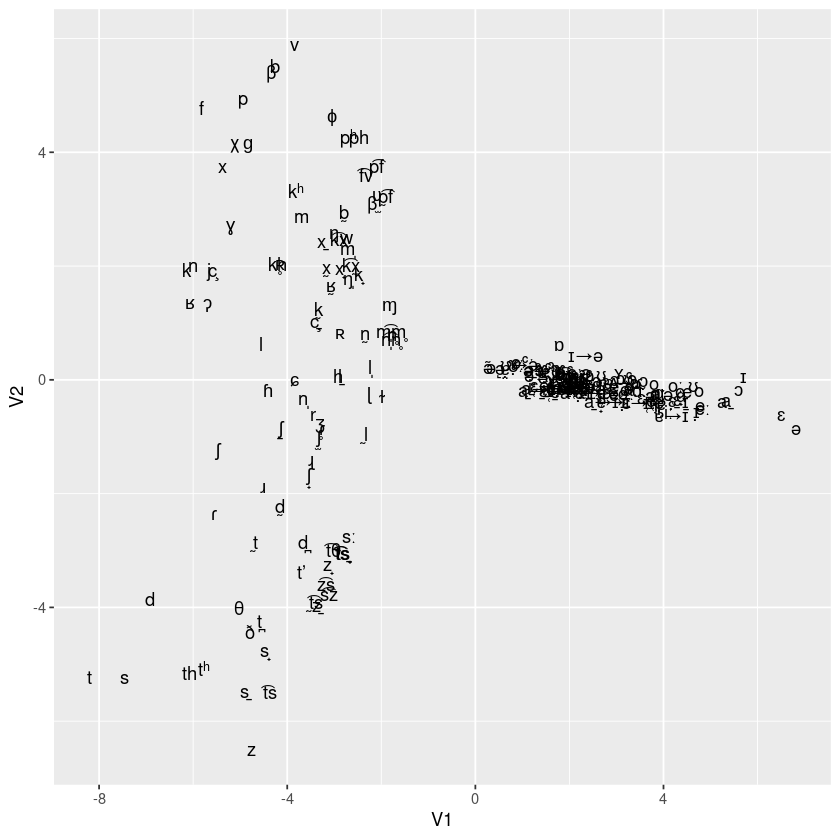

In [36]:

pmiDists <- max(pmi) - pmi

fit <- cmdscale(pmiDists, eig=T)

mds <- as_tibble(fit$points) %>%
  mutate(label = rownames(fit$points))

ggplot(mds) + 
  geom_text(aes(V1, V2, label = label))



Hierarchical clustering

In [ ]:
library(ggdendro)


hc <- pmiDists %>%
  as.dist() %>%
  hclust(method="ward.D2")

ggdendrogram(hc, rotate = T, size=.05)
ggsave("hierarchicalClustering.svg")

Cut the tree at a height that gives 30 clusters. (30 is an arbitray but reasonable number).

In [ ]:
nClasses = 30

soundClasses = cutree(hc, k=nClasses) %>% as.numeric()


In [ ]:
for (i in 1:nClasses) {
    print(paste0(segmentLevels[soundClasses == i], collapse=" "))
}

add soundclass index to alignments

In [ ]:

d <- d %>%
  mutate(soundclass_index = soundClasses[segment_index])

d %>% slice_tail(n=10)

Function for computing the Hamming distance based on sound classes.

In [ ]:

hammingDistance <- function(l1, l2) {
  d1 <- d %>% 
    filter(doculect == l1)
  d2 <- d %>%
    filter(doculect == l2)
 d1 %>%
    full_join(d2, by = c("msa", "position")) %>%
    replace_na(list(soundclass_index.x = 0, soundclass_index.y = 0)) %>%
    select(msa, position, soundclass_index.x, soundclass_index.y, `:ANN.x`, `:ANN.y`) %>%
    mutate(neq = soundclass_index.x != soundclass_index.y) %>%
    group_by(msa) %>%
    summarize(hamming = mean(neq)) %>%
    .$hamming %>% 
    mean() %>%
    return()
}


Computer pairwise Hamming distances.

In [ ]:
doculects = unique(d$doculect)

nDoculects = length(doculects)

dstMtx = matrix(0, nDoculects, nDoculects)

for (i in 1:nDoculects) {
  for (j in 1:nDoculects) {
    if (i < j) {
      dstMtx[i,j] <- dstMtx[j,i] <- hammingDistance(doculects[i], doculects[j])
    }
  }
}

rownames(dstMtx) <- doculects
colnames(dstMtx) <- doculects


Apply MDS with 3 dimensions, map each resulting 3d-vector to colors, and plot on map.

In [ ]:

fit.doculects <- cmdscale(dstMtx, k = 3)

doculect.mds <- 
  as_tibble(fit.doculects) %>%
  mutate(doculect = rownames(fit.doculects)) %>%
  mutate(x = V1 - min(.$V1), y = V2 - min(.$V2), z = V3 - min(.$V3)) %>%
  mutate(r = x / max(.$x), g = y / max(.$y), b = z / max(.$z)) %>%
  mutate(col = rgb(r,g,b)) %>%
  select(doculect, col) 


doculectTbl <- read_tsv(paste0(padPath, "data/doculects.csv"), comment="#") %>%
  rename(doculect = SHORT_NAME) %>%
  select(doculect, LONGITUDE, LATITUDE) %>%
  inner_join(doculect.mds)


ggplot(doculectTbl) +
  geom_point(aes(x=LONGITUDE, y = LATITUDE), col=doculectTbl$col, size=3)


